In [1]:
import pandas as pd

In [2]:
print('Bismillah')

Bismillah


In [3]:
housing = pd.read_csv('Boston.csv')

In [4]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287750,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705298,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

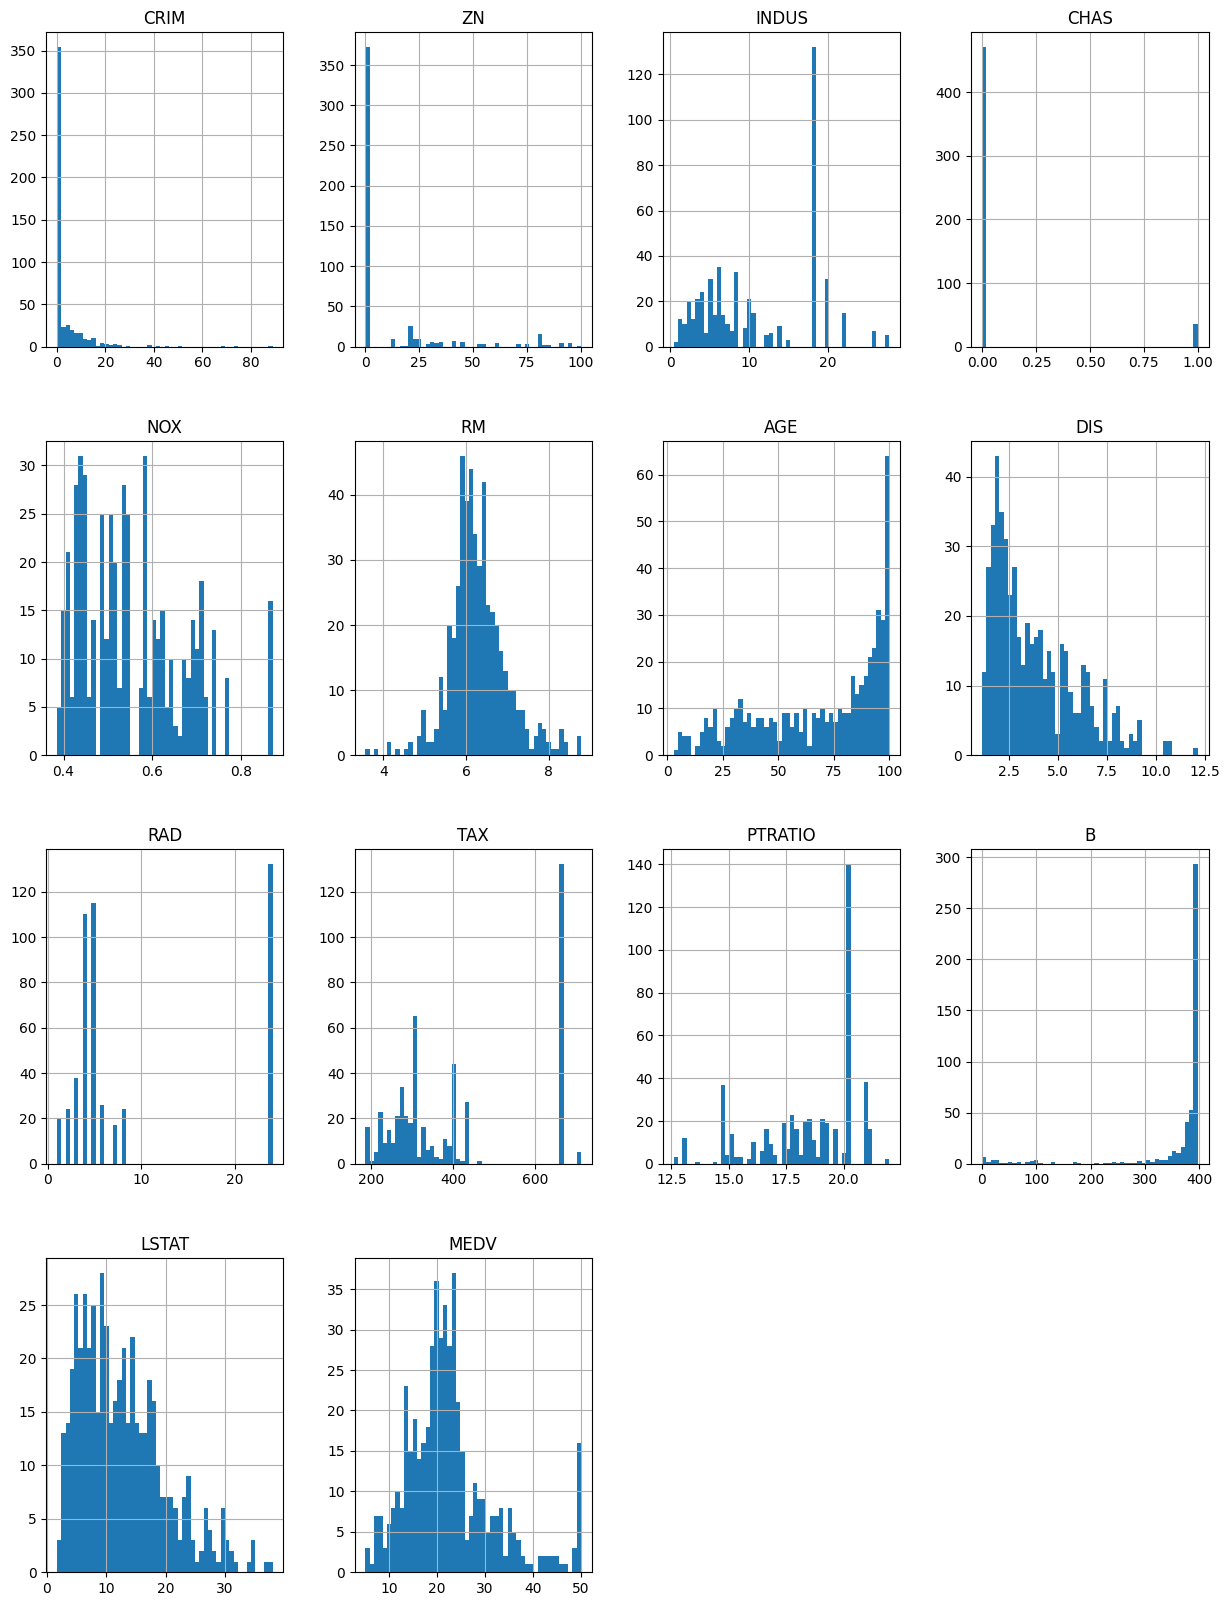

In [8]:
housing.hist(bins = 50, figsize = (15, 20))

In [9]:
import numpy as np

In [10]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [11]:
print(f"train_set: {len(train_set)}\ntest_set: {len(test_set)}")

train_set: 404
test_set: 102


## For divide zeros and once values of a particular Attribute (CHAS) in train and test sets


In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]


In [13]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [14]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [15]:
housing = strat_train_set.copy()

## Looking for Correlation


In [16]:
corr_matrix = housing.corr()

In [17]:
corr_matrix['MEDV'].sort_values()

LSTAT     -0.740494
PTRATIO   -0.493534
INDUS     -0.473516
TAX       -0.456657
NOX       -0.422873
CRIM      -0.393715
RAD       -0.374693
AGE       -0.364596
CHAS       0.205066
DIS        0.240451
ZN         0.339741
B          0.361761
RM         0.680199
MEDV       1.000000
Name: MEDV, dtype: float64

## 1st way of plotting scatter plot

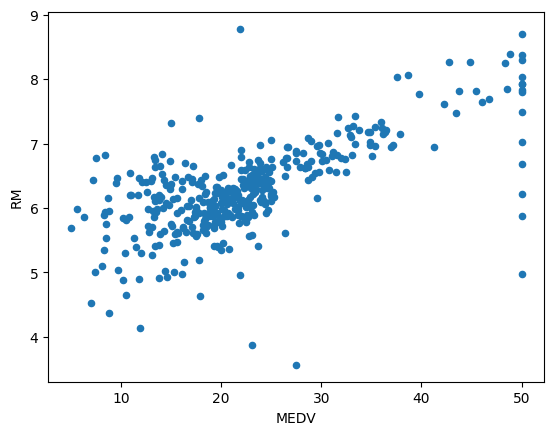

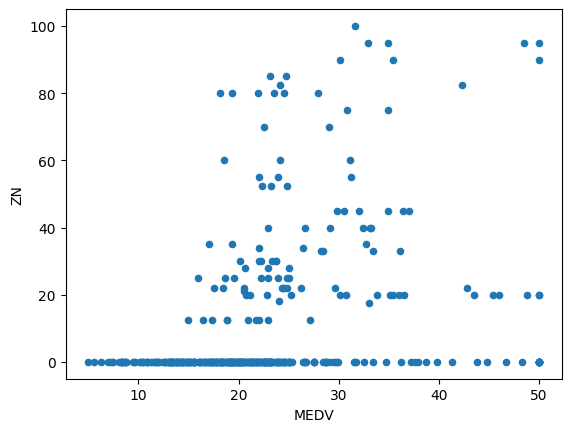

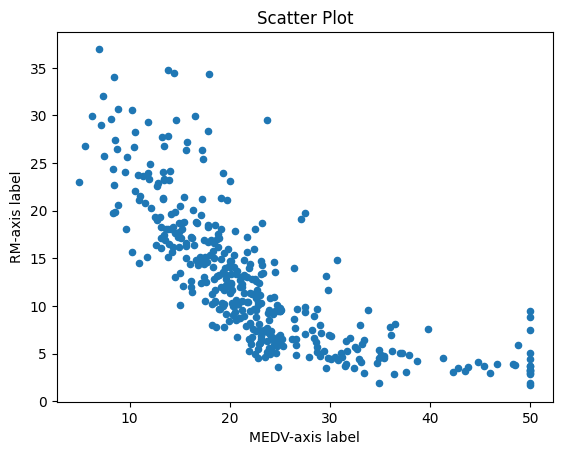

In [18]:
housing.plot.scatter(x = 'MEDV', y = 'RM')
housing.plot.scatter(x = 'MEDV', y = 'ZN')
housing.plot.scatter(x = 'MEDV', y = 'LSTAT')
plt.xlabel('MEDV-axis label')
plt.ylabel('RM-axis label')
plt.title('Scatter Plot')
plt.show()

## 2nd way of plotting scatter plot(when u have to plot multilple grapphs in one go)

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

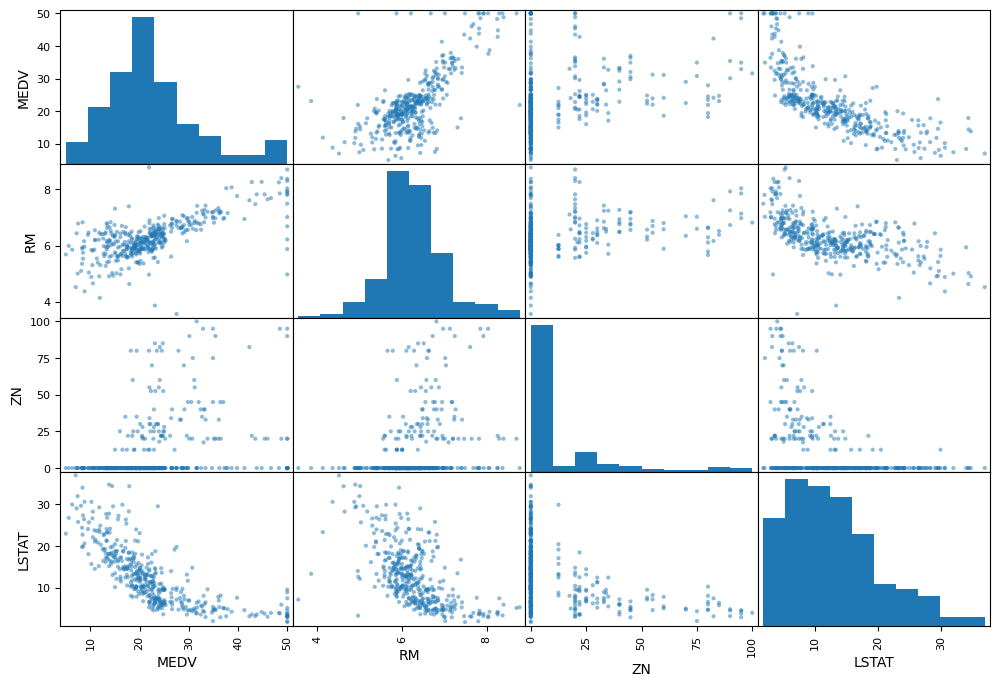

In [19]:

from pandas.plotting import scatter_matrix
attribute = ['MEDV', 'RM', 'ZN', 'LSTAT']
scatter_matrix(housing[attribute], figsize = (12, 8))

## Splitting Features and Lables

In [20]:
housing = strat_train_set.drop(columns = ['MEDV'])
housing_labels = strat_train_set['MEDV'].copy()

## Deleting Null values attribute throughout the whole data frame

In [21]:
housing.dropna().shape

(399, 13)

## Deleting null values attribute from a particular coloumn

In [22]:
a = housing.dropna(subset = ['RM'])
a.shape

(399, 13)

## Deleting a particular Coloumn

In [23]:
a = housing.drop("RM", axis  = 1)
a.shape
a.describe()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [24]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283762,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716453,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.219000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.633000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.28296,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.71203,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.56100,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.88300,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.21900,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.63025,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Creating a pipeline


## Scaling Data Frames


In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy = 'median')), 
                        ('scaler', StandardScaler())
                        ])

In [27]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [28]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selection a Model 


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [30]:
some_data  = housing.iloc[:5]
some_lables = housing_labels.iloc[:5]

In [31]:
prepared_data  = my_pipeline.transform(some_data)

In [32]:
model.predict(prepared_data)

array([22.403, 25.367, 16.447, 23.3  , 23.525])

In [33]:
list(some_lables)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluation the Model

In [34]:
from sklearn.metrics import mean_squared_error
housing_prediction = model.predict(housing_num_tr)
lin_mse  = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)

In [35]:
lin_rmse

1.216256120434774

In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, cv = 5, scoring = 'neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)


In [37]:
rmse_scores

array([2.86853687, 3.68470687, 2.98745187, 3.84451863, 2.9806455 ])

In [38]:
def mean_dev(scores):
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
 

In [39]:
mean_dev(rmse_scores)

Mean:  3.273171948183942
Standard Deviation:  0.40662888595540975


In [40]:
from joblib import dump, load
dump(model, 'Imaginary.joblib')
# joblib is a python library, it is used for saving and loading large Datasets

['Imaginary.joblib']

In [41]:
x_test = strat_test_set.drop("MEDV", axis = 1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_prediction = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [42]:
final_rmse

2.967456067038554

In [43]:
prepared_data[0]


array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24602505, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [44]:
model = load("Imaginary.joblib")

In [52]:
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -6.24602505, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  8.41164221, -6.86091034]])

model.predict(features)

array([24.629])